In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [8]:
df = pd.read_csv('Datasets/data_for_lr.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [9]:
df.shape

(700, 2)

In [10]:
x_train = np.array(df.x[:500]).reshape(500,1)
y_train = np.array(df.y[:500]).reshape(500,1)
x_test = np.array(df.x[500:]).reshape(200,1)
y_test = np.array(df.y[500:]).reshape(200,1)

In [22]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    def lr(self,train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(train_input,m) + c
        return predictions
    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions)**2)
        return cost
    def gradient_function(self,train_input, predictions, train_output):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(np.multiply(df,train_input))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives
    def update_parameters(self,derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.randn() * 0.1  # Small random initialization
        self.parameters['c'] = np.random.randn() * 0.1
        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                   color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.lr(train_input)
            cost = self.cost_function(predictions, train_output)

            if np.isnan(cost) or np.isinf(cost):  # Stop if cost explodes
                print("Stopping training due to numerical instability.")
                ani.event_source.stop()
                return line,

            derivatives = self.gradient_function(train_input, predictions, train_output)
            self.update_parameters(derivatives, learning_rate)

            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=False)

        ani.save('linear_regression_A.gif', writer='pillow')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical instability.
Stopping training due to numerical insta

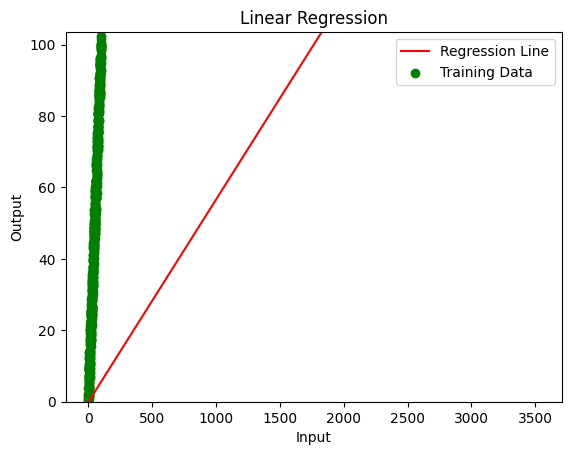

In [23]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(x_train, y_train, 0.00001, 20)